In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_SCS_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1310,2024-05-27,90900,90900,88900,90000,59200
1311,2024-05-28,89500,91000,89300,90000,109100
1312,2024-05-29,90100,91500,90000,90300,121100
1313,2024-05-30,90300,90300,88500,89700,82600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.7 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - loss: 0.5313 - val_loss: 0.0036
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1471 - val_loss: 0.0021
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0899 - val_loss: 0.0084
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0589 - val_loss: 0.0013
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0466 - val_loss: 0.0016
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0393 - val_loss: 0.0028
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0331 - val_loss: 0.0031
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0227 - val_loss: 0.0013
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0227 - val_loss: 0.0012
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0202 - val_loss: 7.5379e-04
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0185 - val_loss: 0.0010
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - los

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1441.7361834023714
MAPE: 1.4116628750626299 %
MSLE: 0.00038317889297261184


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.57260172 0.5912654  0.56513624 0.55953714 0.54647256 0.54833893
 0.53900709 0.53900709 0.52967525 0.53154162 0.53714072 0.53527436
 0.53527436 0.54087346 0.51287794 0.50912654 0.50541247 0.50727884
 0.53900709 0.52780888 0.52780888 0.59873087 0.63979097 0.62486002
 0.62112729 0.6379246  0.64912281 0.65098918 0.64725644 0.65285554
 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838
 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847
 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.945

7 day output [[0.87447536]]
8 day input [0.52967525 0.53154162 0.53714072 0.53527436 0.53527436 0.54087346
 0.51287794 0.50912654 0.50541247 0.50727884 0.53900709 0.52780888
 0.52780888 0.59873087 0.63979097 0.62486002 0.62112729 0.6379246
 0.64912281 0.65098918 0.64725644 0.65285554 0.66592012 0.70324748
 0.70324748 0.68085106 0.71071295 0.69764838 0.71257932 0.70511385
 0.72191116 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588
 0.78723404 0.78723404 0.79656588 0.80776409 0.76297126 0.731243
 0.73684211 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295
 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106
 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947
 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121
 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.

15 day output [[0.8138195]]
16 day input [0.50541247 0.50727884 0.53900709 0.52780888 0.52780888 0.59873087
 0.63979097 0.62486002 0.62112729 0.6379246  0.64912281 0.65098918
 0.64725644 0.65285554 0.66592012 0.70324748 0.70324748 0.68085106
 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116 0.71817842
 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404 0.78723404
 0.79656588 0.80776409 0.76297126 0.731243   0.73684211 0.72004479
 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479
 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852
 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852
 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022
 0.8245614  0.79656588 0.8656215  0.85255692 0.87868608 0.94960806
 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.95064878 0.94574177

23 day output [[0.7748859]]
24 day input [0.62112729 0.6379246  0.64912281 0.65098918 0.64725644 0.65285554
 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838
 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847
 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075
 0.93467712 0.96267264 0.98880179 0.98320269 1.         0.98320269
 0.98320269 0.98880179 0.97760358 0.98320269 0.95064878 0.94574177
 0.92495441 0.91756833 0.90723121 0.88916767 0.88333762 0.87447536
 0.86089075 0.8552787

31 day output [[0.7374711]]
32 day input [0.70324748 0.68085106 0.71071295 0.69764838 0.71257932 0.70511385
 0.72191116 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588
 0.78723404 0.78723404 0.79656588 0.80776409 0.76297126 0.731243
 0.73684211 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295
 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106
 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947
 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121
 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.         0.98320269 0.98320269 0.98880179
 0.97760358 0.98320269 0.95064878 0.94574177 0.92495441 0.91756833
 0.90723121 0.88916767 0.88333762 0.87447536 0.86089075 0.85527873
 0.84253001 0.83752942 0.82873344 0.82673645 0.82205391 0.81381953
 0.81173074 0.8098743  

39 day output [[0.710251]]
40 day input [0.74057484 0.73870847 0.76483763 0.79656588 0.78723404 0.78723404
 0.79656588 0.80776409 0.76297126 0.731243   0.73684211 0.72004479
 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479
 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852
 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852
 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022
 0.8245614  0.79656588 0.8656215  0.85255692 0.87868608 0.94960806
 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.95064878 0.94574177 0.92495441 0.91756833 0.90723121 0.88916767
 0.88333762 0.87447536 0.86089075 0.85527873 0.84253001 0.83752942
 0.82873344 0.82673645 0.82205391 0.81381953 0.81173074 0.8098743
 0.80040944 0.79485297 0.7947644  0.78201473 0.78127337 0.77488589
 0.76588857 0.76268482 0

47 day output [[0.68685853]]
48 day input [0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075
 0.93467712 0.96267264 0.98880179 0.98320269 1.         0.98320269
 0.98320269 0.98880179 0.97760358 0.98320269 0.95064878 0.94574177
 0.92495441 0.91756833 0.90723121 0.88916767 0.88333762 0.87447536
 0.86089075 0.85527873 0.84253001 0.83752942 0.82873344 0.82673645
 0.82205391 0.81381953 0.81173074 0.8098743  0.80040944 0.79485297
 0.7947644  0.78201473 0.78127337 0.77488589 0.76588857 0.76268482
 0.76105428 0.7533443  0.74790704 0.74505544 0.74028683 0.7374711
 0.735708   0.7286411

55 day output [[0.683681]]
56 day input [0.70511385 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106
 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947
 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121
 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.         0.98320269 0.98320269 0.98880179
 0.97760358 0.98320269 0.95064878 0.94574177 0.92495441 0.91756833
 0.90723121 0.88916767 0.88333762 0.87447536 0.86089075 0.85527873
 0.84253001 0.83752942 0.82873344 0.82673645 0.82205391 0.81381953
 0.81173074 0.8098743  0.80040944 0.79485297 0.7947644  0.78201473
 0.78127337 0.77488589 0.76588857 0.76268482 0.76105428 0.7533443
 0.74790704 0.74505544 0.74028683 0.7374711  0.735708   0.72864115
 0.72566593 0.7218591  0.71976697 0.71431911 0.71047485 0.71025097
 0.70166361 0.70156586 

63 day output [[0.6774566]]
64 day input [0.75923852 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852
 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022
 0.8245614  0.79656588 0.8656215  0.85255692 0.87868608 0.94960806
 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.95064878 0.94574177 0.92495441 0.91756833 0.90723121 0.88916767
 0.88333762 0.87447536 0.86089075 0.85527873 0.84253001 0.83752942
 0.82873344 0.82673645 0.82205391 0.81381953 0.81173074 0.8098743
 0.80040944 0.79485297 0.7947644  0.78201473 0.78127337 0.77488589
 0.76588857 0.76268482 0.76105428 0.7533443  0.74790704 0.74505544
 0.74028683 0.7374711  0.735708   0.72864115 0.72566593 0.7218591
 0.71976697 0.71431911 0.71047485 0.71025097 0.70166361 0.70156586
 0.69736791 0.69436085 0.69037986 0.69156003 0.68791664 0.68685853
 0.68693089 0.68565249 0

71 day output [[0.6759776]]
72 day input [0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075
 0.93467712 0.96267264 0.98880179 0.98320269 1.         0.98320269
 0.98320269 0.98880179 0.97760358 0.98320269 0.95064878 0.94574177
 0.92495441 0.91756833 0.90723121 0.88916767 0.88333762 0.87447536
 0.86089075 0.85527873 0.84253001 0.83752942 0.82873344 0.82673645
 0.82205391 0.81381953 0.81173074 0.8098743  0.80040944 0.79485297
 0.7947644  0.78201473 0.78127337 0.77488589 0.76588857 0.76268482
 0.76105428 0.7533443  0.74790704 0.74505544 0.74028683 0.7374711
 0.735708   0.72864115 0.72566593 0.7218591  0.71976697 0.71431911
 0.71047485 0.71025097 0.70166361 0.70156586 0.69736791 0.69436085
 0.69037986 0.69156003 0.68791664 0.68685853 0.68693089 0.68565249
 0.6853224  0.68670678 0.68497801 0.68389881 0.68367887 0.68368101
 0.68053901 0.68069363

79 day output [[0.66830504]]
80 day input [0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.         0.98320269 0.98320269 0.98880179
 0.97760358 0.98320269 0.95064878 0.94574177 0.92495441 0.91756833
 0.90723121 0.88916767 0.88333762 0.87447536 0.86089075 0.85527873
 0.84253001 0.83752942 0.82873344 0.82673645 0.82205391 0.81381953
 0.81173074 0.8098743  0.80040944 0.79485297 0.7947644  0.78201473
 0.78127337 0.77488589 0.76588857 0.76268482 0.76105428 0.7533443
 0.74790704 0.74505544 0.74028683 0.7374711  0.735708   0.72864115
 0.72566593 0.7218591  0.71976697 0.71431911 0.71047485 0.71025097
 0.70166361 0.70156586 0.69736791 0.69436085 0.69037986 0.69156003
 0.68791664 0.68685853 0.68693089 0.68565249 0.6853224  0.68670678
 0.68497801 0.68389881 0.68367887 0.68368101 0.68053901 0.68069363
 0.68218732 0.67724621 0.68024731 0.67647958 0.67912877 0.67745662
 0.68057621 0.6766785

87 day output [[0.6640028]]
88 day input [0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.95064878 0.94574177 0.92495441 0.91756833 0.90723121 0.88916767
 0.88333762 0.87447536 0.86089075 0.85527873 0.84253001 0.83752942
 0.82873344 0.82673645 0.82205391 0.81381953 0.81173074 0.8098743
 0.80040944 0.79485297 0.7947644  0.78201473 0.78127337 0.77488589
 0.76588857 0.76268482 0.76105428 0.7533443  0.74790704 0.74505544
 0.74028683 0.7374711  0.735708   0.72864115 0.72566593 0.7218591
 0.71976697 0.71431911 0.71047485 0.71025097 0.70166361 0.70156586
 0.69736791 0.69436085 0.69037986 0.69156003 0.68791664 0.68685853
 0.68693089 0.68565249 0.6853224  0.68670678 0.68497801 0.68389881
 0.68367887 0.68368101 0.68053901 0.68069363 0.68218732 0.67724621
 0.68024731 0.67647958 0.67912877 0.67745662 0.68057621 0.67667854
 0.68042386 0.67825353 0.67950237 0.67703986 0.67970753 0.67597759
 0.67613077 0.67352176 

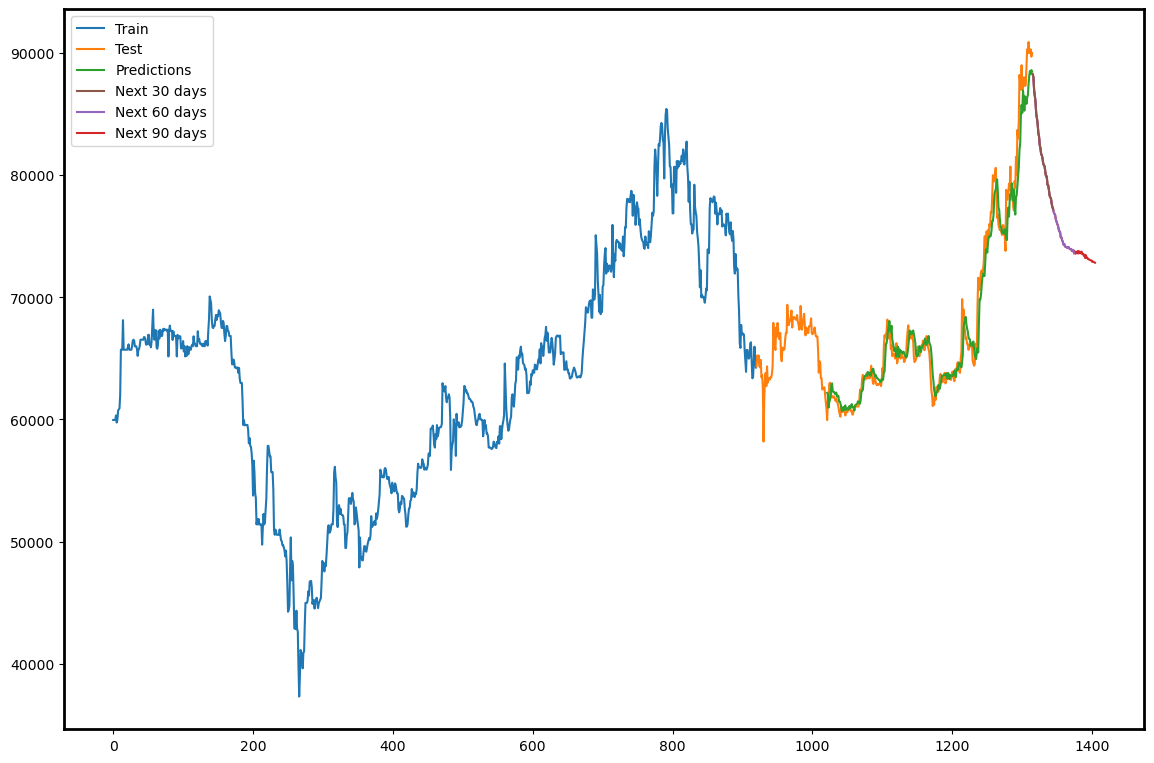

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_SCS_73.png")
plt.show()